## Скорость жидкости $w_{0} = 1.5$ м/c, $x_{0} = 0.5$
## Коэффициент теплопроводности $\lambda = 0.0251$
## Длина пластины $L = 0.8$
## Коэффициент кинематической вязкости $\nu = 14.6\cdot10^{-6}$

In [1]:
import numpy as np
from numpy import polynomial as pn

w0 = 1.5 # Скорость жидкости в м/с
x0 = 0.5
lambd = 0.0251 # Коэффициент теплопроводности
L = 0.8 # Длина пластины
v = 14.6e-6 # Коэффициент вязкости жидкости
epsilon = 1e-6

Re = lambda x: (w0 * x) / v

def alpha(x):
    return 0.0255 * lambd * (Re(x) ** 0.8) / x

def delta(x):
    return (4.64 * x) / np.sqrt(Re(x))

def W(x, y):
    return (3 * w0 * y) / (2 * delta(x)) - (w0 * y ** 3) / (2 * delta(x) ** 3)

In [2]:
def trapezoidal_rule(function, a, b, n):
    h = (b - a) / n
    return ((function(a) + function(b)) / 2 + sum(function(x) for x in np.arange(a + h, b, h))) * h

def simpsons_rule(function, a, b, n):
    h = (b - a) / n
    return h * (sum(2 * function(a + x * h) if x % 2 == 0 else 4 * function(a + x*h) 
                    for x in range(1, n)) + function(a) + function(b)) / 3

def gauss_rule(function, a, b, n):
    t_list, a_list = pn.legendre.leggauss(n)
    return sum(a_i * function((b + a) / 2 + t_i * (b - a) / 2) for a_i, t_i in zip(a_list, t_list)) * (b - a)/2

def runge_rule(function, a, b, eps):
    def calculate(rule, k):
        n = 10
        delta = 1
        result_n = 0.0
        while delta > eps:
            result_n = rule(function, a, b, n)
            result_2n = rule(function, a, b, 2 * n)
            n *= 2
            delta = abs(result_n - result_2n)/k
        return result_n
    return (calculate(trapezoidal_rule, 3), 
            calculate(simpsons_rule, 15))

In [3]:
print('Проверка ламинарности потока Re(L) = ', Re(L))

Проверка ламинарности потока Re(L) =  82191.78082191781


$$W_{sr} = \int_{0}^{\delta(x_{0})} w(x_{0}, y) dy$$
$$W_{sr} = \frac{W_{sr}}{\delta(x_{0})}$$
### Истинное значение: $W_{sr} = 0.937$

In [4]:
values_W = runge_rule(lambda y: W(x0,y), epsilon, delta(x0), 1e-5)
print('Результат метода трапеций:', 
      values_W[0]/delta(x0))
print('Результат метода Симпсона:', 
      values_W[1]/delta(x0))
print('Результат метода Гаусса:', 
      gauss_rule(lambda y: W(x0,y), epsilon, delta(x0), 7)/delta(x0))

Результат метода трапеций: 0.935625355614
Результат метода Симпсона: 0.937499989263
Результат метода Гаусса: 0.937499989263


$$\alpha_{1} = \int_{0}^{L} \alpha(x) dx$$
$$\alpha_{1} = \frac{\alpha_{1}}{L}$$
## Истинное значение: $\alpha_{1} = 8.549$

In [5]:
values_alpha = runge_rule(alpha, epsilon, L, 1e-5)
print('Результат метода трапеций:', 
      values_alpha[0]/L)
print('Результат метода Симпсона:', 
      values_alpha[1]/L)
print('Результат метода Гаусса:', 
      gauss_rule(alpha, epsilon, L, 7)/L)

Результат метода трапеций: 8.54858585564
Результат метода Симпсона: 8.548621429910618
Результат метода Гаусса: 8.49817294709


In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

## Зависимость скорости жидкости от расстояния до поверхности пластины

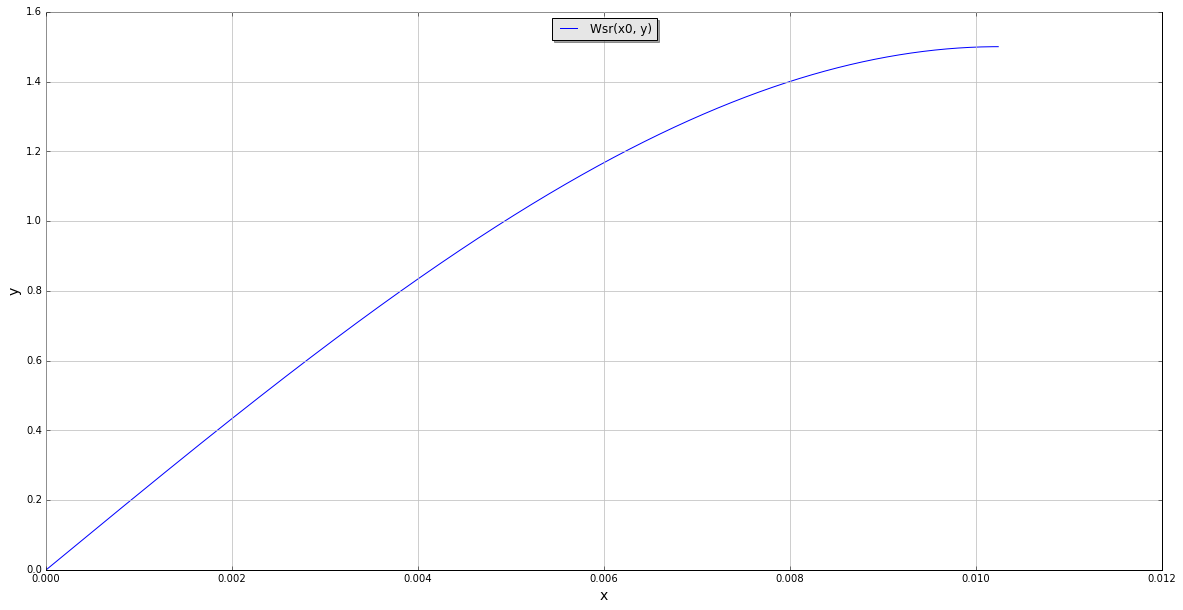

In [7]:
h = 1e-6
xs = np.arange(epsilon , delta(x0) + h, h)
ys = [W(x0, x) for x in xs]

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xs, ys, '-b',label = 'Wsr(x0, y)')
plt.xlim(0, 0.012)

plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper center', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

## Зависимость коэффициента теплоотдачи по длине пластины

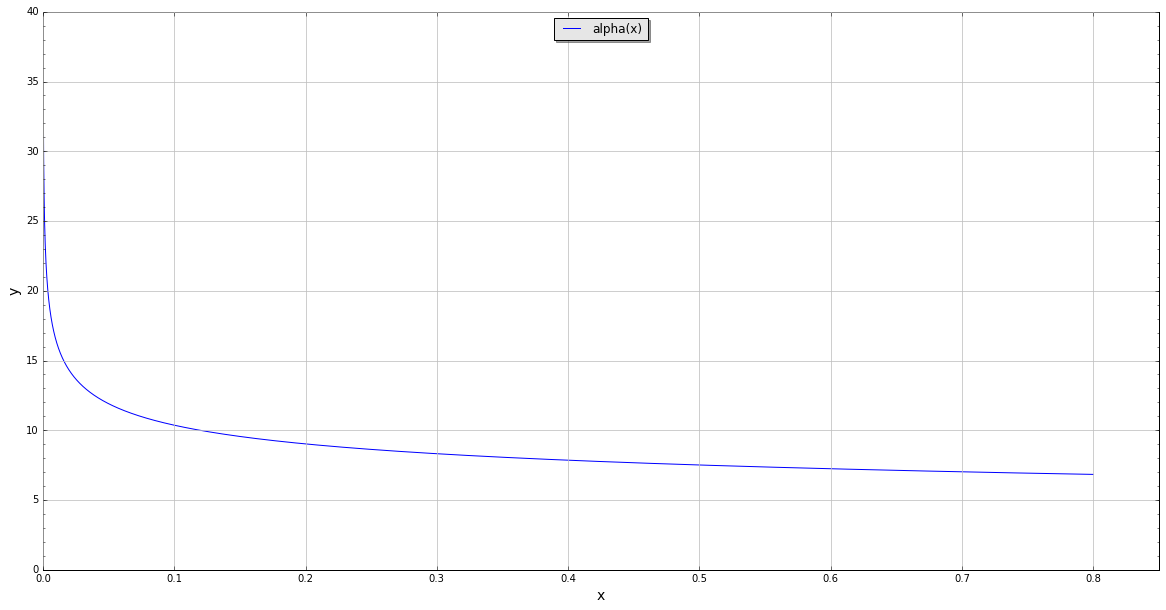

In [8]:
xs = np.arange(epsilon, L + h, h)
ys = [alpha(x) for x in xs]
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xs, ys, '-b',label = 'alpha(x)')

plt.xlim(0, 0.85)
plt.ylim(0, 40)

plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color='black')
ax.axvline(0, color='black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper center', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()